In [62]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/after_down_BCH0.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [63]:
data = data.drop('Unnamed: 0',axis = 1)

In [64]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,BCH,down,2017-08-04 01:00:00,cryptoMelea,0,0,#polo #poloniex,Bitcoin Cash $BCH balances will be credited #p...
1,BCH,down,2017-08-04 01:00:09,tonytheblue,0,0,NaN,GDAX Pledges to Enable Bitcoin Cash Withdrawal...
2,BCH,down,2017-08-04 01:00:11,CryptoCorbin,0,0,NaN,Bitcoin Cash: What you need to know http://crw...
3,BCH,down,2017-08-04 01:00:12,coinspectator,0,0,#crypto #fintech #ico #cryptocurrency,Coinbase to support Bitcoin Cash by January 20...
4,BCH,down,2017-08-04 01:00:16,TradeAltcoins,2,1,#Bitcoin #Bitcoin,Cryptocurrency Analysis: NOTRE DAME MBA EXPLAI...
...,...,...,...,...,...,...,...,...
1507,BCH,down,2017-08-04 06:59:00,ActualidadRT,16,22,NaN,"Nace bitcóin cash, la versión alterna de bitcó..."
1508,BCH,down,2017-08-04 06:59:12,bonzocorleonee,0,3,#BitcoinCash #bitcoinc #Bcash #bcrash,$BCC $BCH #BitcoinCash #bitcoinc(r)ash #Bcash ...
1509,BCH,down,2017-08-04 06:59:18,BryanZhangZ,0,1,#blocks #BitcoinCash #UAHF #Bitcoin #Bitcoin,Only 58 #blocks have been generated for #Bitco...
1510,BCH,down,2017-08-04 06:59:50,CoinUpdates,0,0,NaN,BREAKING NEWS! Coinbase WILL support Bitcoin C...


In [65]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [66]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [67]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [68]:
text['text']

0       [bitcoin, cash, $, bch, balances, will, be, cr...
1       [gdax, pledges, to, enable, bitcoin, cash, wit...
2       [bitcoin, cash, :, what, you, need, to, know, ...
3       [coinbase, to, support, bitcoin, cash, by, jan...
4       [cryptocurrency, analysis, :, notre, dame, mba...
                              ...                        
1507    [nace, bitcóin, cash, ,, la, versión, alterna,...
1508    [$, bcc, $, bch, bitcoincash, bitcoinc, (, r, ...
1509    [only, 58, blocks, have, been, generated, for,...
1510    [breaking, news, !, coinbase, will, support, b...
1511    [breaking, news, coinbase, will, support, bitc...
Name: text, Length: 1512, dtype: object

In [69]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [73]:
text['text']

0       [bitcoin, cash, $, bch, balances, credited, po...
1       [gdax, pledges, enable, bitcoin, cash, withdra...
2                          [bitcoin, cash, :, need, know]
3       [support, bitcoin, cash, january, crypto, fint...
4       [cryptocurrency, analysis, :, notre, dame, mba...
                              ...                        
1507    [nace, bitcóin, cash, ,, la, versión, alterna,...
1508    [$, bcc, $, bch, bitcoincash, bitcoinc, (, r, ...
1509    [blocks, generated, bitcoincash, uahf, ,, bigg...
1510    [breaking, news, !, support, bitcoin, cash, !,...
1511             [breaking, news, support, bitcoin, cash]
Name: text, Length: 1512, dtype: object

In [74]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [75]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [79]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [80]:
article_contents = tokenized_doc.values.tolist()

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [82]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [83]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [84]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [85]:
word2id = defaultdict(lambda: 0)

In [86]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [87]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [88]:
len(tf_idf_result)

1665

In [89]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

1665


In [90]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [91]:
sentences = article_contents

In [92]:
from gensim.models import Word2Vec

In [93]:
model = Word2Vec(sentences, min_count=1)

In [94]:
len(model.wv.vocab)

1665

In [95]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [96]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [97]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [98]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [99]:
temp_cluster_result['cluster'] = assigned_clusters

In [100]:
temp_cluster_result['raw_data'] = X.tolist()

In [101]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [102]:
from sklearn.metrics import pairwise_distances

In [103]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [104]:
len(cosine_centroid_list)

1665

In [105]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [106]:
sum(temp_distance[3])

91.86422311458297

In [107]:
import scipy.spatial.distance as dist

In [108]:
dist.cosine(X[0],cosine_centroid_list[0])

8.955716483305398e-05

In [109]:
dist.euclidean(X[0],cosine_centroid_list[0])

2.7413821526762536

In [110]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [111]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [112]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[0.697681188583374, 0.12951642274856567, -0.26...",bitcoin,0,"[0.06470712, 0.01263071, -0.024915507, 0.04500...",0.000090,0.726993,0.273097,NaN
1,"[0.6052890419960022, 0.11939484626054764, -0.2...",cash,0,"[0.06470712, 0.01263071, -0.024915507, 0.04500...",0.000107,0.580814,0.419294,NaN
13,"[0.14602328836917877, 0.03045993112027645, -0....",support,0,"[0.06470712, 0.01263071, -0.024915507, 0.04500...",0.001757,0.230977,0.770780,NaN
74,"[0.1277412623167038, 0.02385888062417507, -0.0...",trade,0,"[0.06470712, 0.01263071, -0.024915507, 0.04500...",0.003050,0.163565,0.839486,NaN
1142,"[0.06553962081670761, 0.007862716913223267, -0...",commit,0,"[0.06470712, 0.01263071, -0.024915507, 0.04500...",0.007871,0.154340,0.853531,NaN
32,"[0.8003847002983093, 0.15961013734340668, -0.3...",bitcoincash,0,"[0.06470712, 0.01263071, -0.024915507, 0.04500...",0.000033,0.076992,0.923041,NaN
23,"[0.38117843866348267, 0.06909597665071487, -0....",price,0,"[0.06470712, 0.01263071, -0.024915507, 0.04500...",0.000276,0.052866,0.947410,NaN
18,"[0.36833176016807556, 0.07248294353485107, -0....",news,0,"[0.06470712, 0.01263071, -0.024915507, 0.04500...",0.000175,0.044350,0.955825,NaN
80,"[0.22944407165050507, 0.048348814249038696, -0...",update,0,"[0.06470712, 0.01263071, -0.024915507, 0.04500...",0.000520,0.035126,0.965394,NaN
9,"[0.18177443742752075, 0.039899419993162155, -0...",withdrawal,0,"[0.06470712, 0.01263071, -0.024915507, 0.04500...",0.001549,0.035835,0.965714,NaN


In [113]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1070,"[0.05938597396016121, 0.015254502184689045, -0...",técnica,1,"[0.018499983, 0.0037296782, -0.0075172265, 0.0...",0.005403,0.001064,1.004339,NaN
995,"[0.060736045241355896, 0.013113816268742085, -...",criptomoedas,1,"[0.018499983, 0.0037296782, -0.0075172265, 0.0...",0.007235,0.000355,1.006880,NaN
997,"[0.04682071879506111, 0.004938511177897453, -0...",valiosas,1,"[0.018499983, 0.0037296782, -0.0075172265, 0.0...",0.008351,0.000355,1.007996,NaN
322,"[0.046093378216028214, 0.012815838679671288, -...",tune,1,"[0.018499983, 0.0037296782, -0.0075172265, 0.0...",0.009369,0.000710,1.008660,NaN
942,"[0.0500594899058342, 0.007374504581093788, -0....",_newstechnology,1,"[0.018499983, 0.0037296782, -0.0075172265, 0.0...",0.009865,0.001064,1.008801,NaN
903,"[0.04480171948671341, 0.009006233885884285, -0...",supporter,1,"[0.018499983, 0.0037296782, -0.0075172265, 0.0...",0.011144,0.000710,1.010434,NaN
394,"[0.047718603163957596, 0.004007352516055107, -...",death,1,"[0.018499983, 0.0037296782, -0.0075172265, 0.0...",0.011643,0.000710,1.010934,NaN
418,"[0.04452551156282425, 0.010932821780443192, -0...",podemos,1,"[0.018499983, 0.0037296782, -0.0075172265, 0.0...",0.011514,0.000355,1.011159,NaN
277,"[0.04283163696527481, 0.00552654592320323, -0....",original,1,"[0.018499983, 0.0037296782, -0.0075172265, 0.0...",0.012388,0.000710,1.011678,NaN
966,"[0.04277888685464859, 0.012454994954168797, -0...",gamble,1,"[0.018499983, 0.0037296782, -0.0075172265, 0.0...",0.012652,0.000355,1.012297,NaN


In [114]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1196,"[0.02657180279493332, 0.003296283073723316, -0...",tecnología,2,"[0.0069090775, 0.001659056, -0.003125057, 0.00...",0.024780,0.000710,1.024070,NaN
1111,"[0.017794188112020493, 0.00710776774212718, -0...",splitter,2,"[0.0069090775, 0.001659056, -0.003125057, 0.00...",0.066202,0.000355,1.065847,NaN
1639,"[0.01718023605644703, 0.0006652247975580394, -...",necesario,2,"[0.0069090775, 0.001659056, -0.003125057, 0.00...",0.087561,0.000355,1.087206,NaN
1277,"[0.013613315299153328, 0.006878400221467018, -...",yettech,2,"[0.0069090775, 0.001659056, -0.003125057, 0.00...",0.095352,0.000355,1.094997,NaN
456,"[0.017229562625288963, 0.004700714256614447, -...",cash（ビットコインキャッシュ）の付与、取引、送金・受金対応状況（随時更新）,2,"[0.0069090775, 0.001659056, -0.003125057, 0.00...",0.095501,0.000355,1.095146,NaN
1663,"[0.010361764580011368, -0.000795097672380507, ...",uahf,2,"[0.0069090775, 0.001659056, -0.003125057, 0.00...",0.101669,0.000355,1.101314,NaN
301,"[0.008668308146297932, 0.004862994886934757, -...",faucethub,2,"[0.0069090775, 0.001659056, -0.003125057, 0.00...",0.111666,0.000355,1.111311,NaN
1598,"[0.01608450338244438, 0.002349640941247344, -0...",freewallet,2,"[0.0069090775, 0.001659056, -0.003125057, 0.00...",0.120042,0.000355,1.119688,NaN
968,"[0.013905324041843414, 0.0014533710200339556, ...",cryptofactz,2,"[0.0069090775, 0.001659056, -0.003125057, 0.00...",0.121675,0.000355,1.121320,NaN
690,"[0.015245427377521992, 0.0028433366678655148, ...",moeuva,2,"[0.0069090775, 0.001659056, -0.003125057, 0.00...",0.128718,0.000355,1.128364,NaN


In [115]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1151,"[-0.04116923362016678, -0.00815504603087902, 0...",digitaleconomy,3,"[-0.0036561755, -0.00038866658, 0.0012033357, ...",0.038728,0.001064,1.037663,NaN
1369,"[-0.013357214629650116, 0.0002960107522085309,...",pbhbsg,3,"[-0.0036561755, -0.00038866658, 0.0012033357, ...",0.108097,0.000355,1.107742,NaN
979,"[-0.009870992042124271, 0.002151698339730501, ...",pbgwkz,3,"[-0.0036561755, -0.00038866658, 0.0012033357, ...",0.195544,0.000355,1.195189,NaN
1289,"[-0.008325017988681793, -0.004067892674356699,...",ycfrhsza,3,"[-0.0036561755, -0.00038866658, 0.0012033357, ...",0.269026,0.000355,1.268671,NaN
1250,"[-0.0014177702832967043, -0.004423100966960192...",trad,3,"[-0.0036561755, -0.00038866658, 0.0012033357, ...",0.278742,0.000710,1.278032,NaN
1414,"[-0.010345637798309326, 0.0011706610675901175,...",cash中文簡稱是否比特鈔？,3,"[-0.0036561755, -0.00038866658, 0.0012033357, ...",0.313774,0.000355,1.313420,NaN
1303,"[-0.005937253590673208, -0.0017769316909834743...",folback,3,"[-0.0036561755, -0.00038866658, 0.0012033357, ...",0.333595,0.000355,1.333240,NaN
409,"[-0.00728203309699893, -0.005885595455765724, ...",secrecon,3,"[-0.0036561755, -0.00038866658, 0.0012033357, ...",0.342791,0.000355,1.342436,NaN
1177,"[-0.006796138361096382, -0.0031285241711884737...",pbgrwh,3,"[-0.0036561755, -0.00038866658, 0.0012033357, ...",0.393670,0.000355,1.393315,NaN
1208,"[-0.009057006798684597, 0.0004633727949112654,...",crossnw,3,"[-0.0036561755, -0.00038866658, 0.0012033357, ...",0.399643,0.000710,1.398933,NaN


In [116]:
y_km = temp_cluster_result['cluster'].values

In [117]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

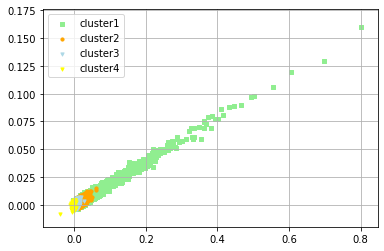

In [118]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [119]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소

1292

In [120]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 부정

264

In [121]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 기술

64

In [122]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기타

45

In [123]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [124]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 13 # 거래소

In [125]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 2 # 부정

In [126]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 9 # 기술

In [127]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 13 # 기타

In [128]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [129]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [130]:
kmeans.inertia_

20.91714859008789

In [131]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[2 2 0 ... 1 1 1]


In [132]:
cluster_values= list(model.wv.vocab)

In [133]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-20.917146682739258


In [134]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [135]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.61348385


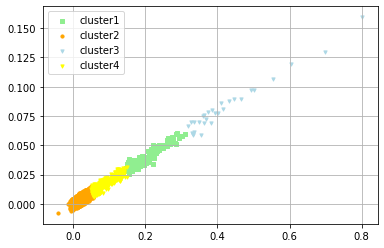

In [136]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [137]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [138]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [139]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [140]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [141]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [142]:
import scipy.spatial.distance as dist

In [143]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [144]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [145]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
180,"[0.20867964625358582, 0.03574388101696968, -0....",altcoin,0,"[0.2061221, 0.04040707, -0.07932605, 0.1434110...",0.029942,0.005677,1.024265,NaN
290,"[0.21021947264671326, 0.0419413223862648, -0.0...",bitcóin,0,"[0.2061221, 0.04040707, -0.07932605, 0.1434110...",0.028111,0.003548,1.024563,NaN
250,"[0.20734429359436035, 0.04474453255534172, -0....",next,0,"[0.2061221, 0.04040707, -0.07932605, 0.1434110...",0.029798,0.003548,1.026250,NaN
891,"[0.2057051658630371, 0.04012622684240341, -0.0...",think,0,"[0.2061221, 0.04040707, -0.07932605, 0.1434110...",0.030069,0.003193,1.026875,NaN
28,"[0.20909720659255981, 0.03825366124510765, -0....",course,0,"[0.2061221, 0.04040707, -0.07932605, 0.1434110...",0.036591,0.008870,1.027721,NaN
518,"[0.2082262933254242, 0.037541426718235016, -0....",stand,0,"[0.2061221, 0.04040707, -0.07932605, 0.1434110...",0.032313,0.003903,1.028410,NaN
1211,"[0.2104879915714264, 0.03733290731906891, -0.0...",criptovaluta,0,"[0.2061221, 0.04040707, -0.07932605, 0.1434110...",0.033027,0.004612,1.028415,NaN
1431,"[0.2108018547296524, 0.04109271988272667, -0.0...",продажа,0,"[0.2061221, 0.04040707, -0.07932605, 0.1434110...",0.035532,0.007096,1.028436,NaN
37,"[0.20313602685928345, 0.03516014292836189, -0....",article,0,"[0.2061221, 0.04040707, -0.07932605, 0.1434110...",0.033955,0.005322,1.028633,NaN
411,"[0.20353707671165466, 0.035445600748062134, -0...",mercado,0,"[0.2061221, 0.04040707, -0.07932605, 0.1434110...",0.032171,0.002484,1.029688,NaN


In [146]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
507,"[0.01999123953282833, 0.0026369732804596424, -...",cataly,1,"[0.022863159, 0.0044713994, -0.00892826, 0.016...",0.023771,0.000355,1.023416,NaN
708,"[0.02577405981719494, 0.003580535529181361, -0...",예정입니다,1,"[0.022863159, 0.0044713994, -0.00892826, 0.016...",0.026002,0.000355,1.025647,NaN
482,"[0.022786568850278854, 0.009439406916499138, -...",faith,1,"[0.022863159, 0.0044713994, -0.00892826, 0.016...",0.026165,0.000355,1.025810,NaN
1406,"[0.022401342168450356, 0.00369851803407073, -0...",disappoint,1,"[0.022863159, 0.0044713994, -0.00892826, 0.016...",0.026444,0.000355,1.026089,NaN
762,"[0.025511110201478004, 0.006792144849896431, -...",codebase,1,"[0.022863159, 0.0044713994, -0.00892826, 0.016...",0.026877,0.000355,1.026522,NaN
1308,"[0.019446950405836105, 0.004527185577899218, -...",spidering,1,"[0.022863159, 0.0044713994, -0.00892826, 0.016...",0.026948,0.000355,1.026593,NaN
415,"[0.024976758286356926, 0.002846783259883523, -...",separa,1,"[0.022863159, 0.0044713994, -0.00892826, 0.016...",0.026966,0.000355,1.026611,NaN
726,"[0.02234772965312004, 0.007966116070747375, -0...",afterall,1,"[0.022863159, 0.0044713994, -0.00892826, 0.016...",0.026983,0.000355,1.026628,NaN
1155,"[0.020723147317767143, 0.0036500936839729548, ...",neue,1,"[0.022863159, 0.0044713994, -0.00892826, 0.016...",0.027365,0.000710,1.026656,NaN
886,"[0.022598424926400185, 0.0024505839683115482, ...",battle,1,"[0.022863159, 0.0044713994, -0.00892826, 0.016...",0.027489,0.000710,1.026779,NaN


In [147]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
287,"[0.4151340425014496, 0.08087067306041718, -0.1...",youtube,2,"[0.42149833, 0.08256366, -0.16090594, 0.293071...",0.028121,0.008515,1.019606,NaN
77,"[0.43142881989479065, 0.08798249810934067, -0....",user,2,"[0.42149833, 0.08256366, -0.16090594, 0.293071...",0.043842,0.017740,1.026102,NaN
5,"[0.4108520448207855, 0.08585372567176819, -0.1...",poloniex,2,"[0.42149833, 0.08256366, -0.16090594, 0.293071...",0.044920,0.013483,1.031437,NaN
83,"[0.4018357992172241, 0.07760414481163025, -0.1...",sell,2,"[0.42149833, 0.08256366, -0.16090594, 0.293071...",0.093637,0.023417,1.070220,NaN
26,"[0.44610166549682617, 0.08919557929039001, -0....",blockchain,2,"[0.42149833, 0.08256366, -0.16090594, 0.293071...",0.124568,0.024481,1.100086,NaN
238,"[0.3935231566429138, 0.0771876871585846, -0.15...",ethereum,2,"[0.42149833, 0.08256366, -0.16090594, 0.293071...",0.126722,0.008160,1.118561,NaN
129,"[0.38604098558425903, 0.07999764382839203, -0....",exchange,2,"[0.42149833, 0.08256366, -0.16090594, 0.293071...",0.145986,0.010644,1.135342,NaN
23,"[0.38117843866348267, 0.06909597665071487, -0....",price,2,"[0.42149833, 0.08256366, -0.16090594, 0.293071...",0.194606,0.052866,1.141740,NaN
134,"[0.37326982617378235, 0.07873882353305817, -0....",network,2,"[0.42149833, 0.08256366, -0.16090594, 0.293071...",0.201713,0.010644,1.191069,NaN
18,"[0.36833176016807556, 0.07248294353485107, -0....",news,2,"[0.42149833, 0.08256366, -0.16090594, 0.293071...",0.240527,0.044350,1.196176,NaN


In [148]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1142,"[0.06553962081670761, 0.007862716913223267, -0...",commit,3,"[0.08606398, 0.016892083, -0.033253815, 0.0598...",0.076772,0.154340,0.922433,NaN
74,"[0.1277412623167038, 0.02385888062417507, -0.0...",trade,3,"[0.08606398, 0.016892083, -0.033253815, 0.0598...",0.174836,0.163565,1.011272,NaN
343,"[0.07900740206241608, 0.015167277306318283, -0...",technology,3,"[0.08606398, 0.016892083, -0.033253815, 0.0598...",0.028175,0.004612,1.023562,NaN
889,"[0.08793725818395615, 0.014513084664940834, -0...",unocoin,3,"[0.08606398, 0.016892083, -0.033253815, 0.0598...",0.027406,0.002129,1.025278,NaN
208,"[0.0834193006157875, 0.015045239590108395, -0....",take,3,"[0.08606398, 0.016892083, -0.033253815, 0.0598...",0.027689,0.001774,1.025915,NaN
316,"[0.08914502710103989, 0.016090046614408493, -0...",fund,3,"[0.08606398, 0.016892083, -0.033253815, 0.0598...",0.028206,0.002129,1.026077,NaN
1016,"[0.08446945250034332, 0.015861352905631065, -0...",hype,3,"[0.08606398, 0.016892083, -0.033253815, 0.0598...",0.027075,0.000710,1.026366,NaN
171,"[0.0858972817659378, 0.017492875456809998, -0....",issue,3,"[0.08606398, 0.016892083, -0.033253815, 0.0598...",0.027852,0.001064,1.026788,NaN
596,"[0.08450812846422195, 0.01713951677083969, -0....",punto,3,"[0.08606398, 0.016892083, -0.033253815, 0.0598...",0.027954,0.001064,1.026889,NaN
594,"[0.08392534404993057, 0.019637152552604675, -0...",precio,3,"[0.08606398, 0.016892083, -0.033253815, 0.0598...",0.028528,0.001419,1.027109,NaN


In [153]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 비즈

110

In [154]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 부정

1225

In [155]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 거래소

29

In [156]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 인플

301

In [164]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [165]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 7 # 비즈

In [166]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 2 # 부정

In [167]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 12 # 거래소

In [168]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 6 # 인플

In [169]:
temp_cluster_result1['Silhouette'] = 0.61348385
temp_cluster_result['Silhouette'] = 0.61348385
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [170]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/after_down_BCH0_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/after_down_BCH0_cosine")